In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from igp2.agents.agentstate import AgentState
from igp2.data.data_loaders import InDDataLoader
from igp2.data.episode import Frame
from igp2.data.scenario import InDScenario, ScenarioConfig
from igp2.opendrive.map import Map
from igp2.opendrive.plot_map import plot_map
from core.feature_extraction import FeatureExtractor, GoalDetector

In [2]:
odr_results = pd.read_csv('../predictions/heckstrasse_trained_trees_test.csv')

In [3]:
odr_results

,episode,agent_id,frame_id,true_goal,true_goal_type,fraction_observed,model_prediction,predicted_goal_type,model_probs,max_probs,min_probs,model_entropy,model_entropy_norm,model_correct
0,0,0,0,2,turn-left,0.0,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
1,0,0,8,2,turn-left,0.1,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
2,0,0,16,2,turn-left,0.2,1,straight-on,0.882632,0.882632,0.117368,0.361648,0.521747,False
3,0,0,24,2,turn-left,0.3,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
4,0,0,32,2,turn-left,0.4,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4109,0,409,25451,1,straight-on,0.6,1,straight-on,0.998728,0.998728,0.001272,0.009755,0.014073,True
4110,0,409,25457,1,straight-on,0.7,1,straight-on,0.998728,0.998728,0.001272,0.009755,0.014073,True
4111,0,409,25463,1,straight-on,0.8,1,straight-on,0.998728,0.998728,0.001272,0.009755,0.014073,True
4112,0,409,25469,1,straight-on,0.9,1,straight-on,0.998728,0.998728,0.001272,0.009755,0.014073,True


In [4]:
lanelet_results = pd.read_csv('../../GRIT/predictions/heckstrasse_trained_trees_test.csv')

In [5]:
lanelet_results

,episode,agent_id,frame_id,true_goal,true_goal_type,fraction_observed,model_prediction,predicted_goal_type,model_probs,max_probs,min_probs,model_entropy,model_entropy_norm,model_correct
0,0,0,0,2,turn-left,0.0,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
1,0,0,8,2,turn-left,0.1,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
2,0,0,16,2,turn-left,0.2,1,straight-on,0.882632,0.882632,0.117368,0.361648,0.521747,False
3,0,0,24,2,turn-left,0.3,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
4,0,0,32,2,turn-left,0.4,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4109,0,409,25451,1,straight-on,0.6,1,straight-on,0.998728,0.998728,0.001272,0.009755,0.014073,True
4110,0,409,25457,1,straight-on,0.7,1,straight-on,0.998728,0.998728,0.001272,0.009755,0.014073,True
4111,0,409,25463,1,straight-on,0.8,1,straight-on,0.998728,0.998728,0.001272,0.009755,0.014073,True
4112,0,409,25469,1,straight-on,0.9,1,straight-on,0.998728,0.998728,0.001272,0.009755,0.014073,True


In [6]:
lanelet_results.loc[lanelet_results.agent_id==0]

,episode,agent_id,frame_id,true_goal,true_goal_type,fraction_observed,model_prediction,predicted_goal_type,model_probs,max_probs,min_probs,model_entropy,model_entropy_norm,model_correct
0,0,0,0,2,turn-left,0.0,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
1,0,0,8,2,turn-left,0.1,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
2,0,0,16,2,turn-left,0.2,1,straight-on,0.882632,0.882632,0.117368,0.361648,0.521747,False
3,0,0,24,2,turn-left,0.3,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
4,0,0,32,2,turn-left,0.4,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
5,0,0,40,2,turn-left,0.5,2,turn-left,0.909572,0.909572,0.090428,0.303527,0.437897,True
6,0,0,48,2,turn-left,0.6,2,turn-left,0.909572,0.909572,0.090428,0.303527,0.437897,True
7,0,0,56,2,turn-left,0.7,2,turn-left,0.909572,0.909572,0.090428,0.303527,0.437897,True
8,0,0,64,2,turn-left,0.8,2,turn-left,0.909572,0.909572,0.090428,0.303527,0.437897,True
9,0,0,72,2,turn-left,0.9,2,turn-left,0.909572,0.909572,0.090428,0.303527,0.437897,True


In [7]:
odr_results.loc[odr_results.agent_id==0]

,episode,agent_id,frame_id,true_goal,true_goal_type,fraction_observed,model_prediction,predicted_goal_type,model_probs,max_probs,min_probs,model_entropy,model_entropy_norm,model_correct
0,0,0,0,2,turn-left,0.0,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
1,0,0,8,2,turn-left,0.1,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
2,0,0,16,2,turn-left,0.2,1,straight-on,0.882632,0.882632,0.117368,0.361648,0.521747,False
3,0,0,24,2,turn-left,0.3,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
4,0,0,32,2,turn-left,0.4,2,turn-left,0.872352,0.872352,0.127648,0.381891,0.550953,True
5,0,0,40,2,turn-left,0.5,2,turn-left,0.909572,0.909572,0.090428,0.303527,0.437897,True
6,0,0,48,2,turn-left,0.6,2,turn-left,0.909572,0.909572,0.090428,0.303527,0.437897,True
7,0,0,56,2,turn-left,0.7,2,turn-left,0.909572,0.909572,0.090428,0.303527,0.437897,True
8,0,0,64,2,turn-left,0.8,2,turn-left,0.909572,0.909572,0.090428,0.303527,0.437897,True
9,0,0,72,2,turn-left,0.9,2,turn-left,0.909572,0.909572,0.090428,0.303527,0.437897,True


At frame 60, the vehicle is still far from the goal - why do predictions end here?

Try getting reachable goals from above frame 60

In [8]:
%cd ..

/home/cillian/phd/projects/GRIT


In [9]:
scenario_name = 'heckstrasse'
scenario_map = Map.parse_from_opendrive(f"scenarios/maps/{scenario_name}.xodr")

scenario_config = ScenarioConfig.load(f"scenarios/configs/{scenario_name}.json")
scenario = InDScenario(scenario_config)

In [10]:
goal_detector = GoalDetector(scenario.config.goals)

In [11]:
episode_idx = 0
episode = scenario.load_episode(episode_idx)

In [12]:
agent = episode.agents[0]

In [13]:
agent_goals, goal_frame_idxes = goal_detector.detect_goals(agent.trajectory)

In [14]:
agent_goals

[2]

In [15]:
trajectory = agent.trajectory

In [16]:
feature_extractor = FeatureExtractor(scenario_map)

In [17]:
for idx in range(0, len(agent.trajectory.path)):
    state = AgentState(trajectory.timesteps[idx], trajectory.path[idx],
                       trajectory.velocity[idx], np.array([0, 0]), trajectory.heading[idx])
    typed_goals = feature_extractor.get_typed_goals(state, scenario.config.goals)
    print(idx, [g is not None for g in typed_goals])

0 [False, True, True]
1 [False, True, True]
2 [False, True, True]
3 [False, True, True]
4 [False, True, True]
5 [False, True, True]
6 [False, True, True]
7 [False, True, True]
8 [False, True, True]
9 [False, True, True]
10 [False, True, True]
11 [False, True, True]
12 [False, True, True]
13 [False, True, True]
14 [False, True, True]
15 [False, True, True]
16 [False, True, True]
17 [False, True, True]
18 [False, True, True]
19 [False, True, True]
20 [False, True, True]
21 [False, True, True]
22 [False, True, True]
23 [False, True, True]
24 [False, True, True]
25 [False, True, True]
26 [False, True, True]
27 [False, True, True]
28 [False, True, True]
29 [False, True, True]
30 [False, True, True]
31 [False, True, True]
32 [False, True, True]
33 [False, True, True]
34 [False, True, True]
35 [False, True, True]
36 [False, True, True]
37 [False, True, True]
38 [False, True, True]
39 [False, True, True]
40 [False, True, True]
41 [False, True, True]
42 [False, True, True]
43 [False, True, True

In [18]:
typed_goals

[TypedGoal(goal_type='turn-right', goal=PointGoal(center=(35.16491292750459, -17.638242499380723), r=1.8371179624001872), lane_path=[Lane(id=-1) on Road(id=9), Lane(id=-1) on Road(id=3)]),
 TypedGoal(goal_type='turn-left', goal=PointGoal(center=(62.00460278758087, -47.03266253796622), r=1.9847100000000002), lane_path=[Lane(id=-1) on Road(id=9), Lane(id=-1) on Road(id=6)]),
 TypedGoal(goal_type='turn-left', goal=PointGoal(center=(60.28649753795391, -18.63995200476946), r=1.5545799999999999), lane_path=[Lane(id=-1) on Road(id=5)])]

In [19]:
agent.trajectory.path[68]

array([ 33.48256, -20.12529])

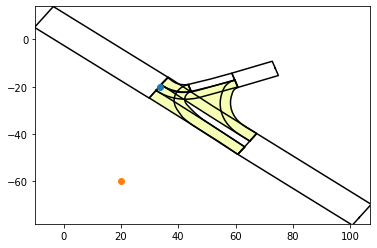

In [20]:
ax = plot_map(scenario_map)
ax.plot(*agent.trajectory.path[68], 'o')
ax.plot([20],[-60], 'o')

In [21]:
scenario_map.lanes_at(agent.trajectory.path[68], max_distance=3)

[Lane(id=1) on Road(id=1),
 Lane(id=2) on Road(id=1),
 Lane(id=-1) on Road(id=1),
 Lane(id=-1) on Road(id=3),
 Lane(id=-1) on Road(id=5),
 Lane(id=-1) on Road(id=7),
 Lane(id=-1) on Road(id=8)]

In [22]:
lanes = scenario_map.lanes_within_angle(agent.trajectory.path[68],
                                        agent.trajectory.heading[68],
                                threshold=np.pi/4, max_distance=3)
print(lanes)

[Lane(id=-1) on Road(id=5), Lane(id=-1) on Road(id=7)]


In [23]:
agent.trajectory.heading[68]

-0.4904352508823777

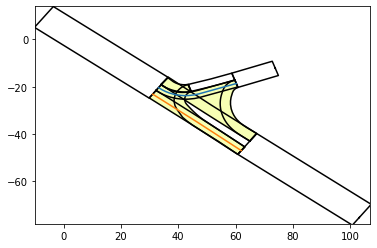

In [24]:
ax = plot_map(scenario_map)
for lane in lanes:
    ax.plot(*list(zip(*[x for x in lane.midline.coords])))